# **Project 4. Tardigrades: from genestealers to space marines**


**1. download assembled genome**

In [1]:
#!wget ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001/949/185/GCA_001949185.1_Rvar_4.0/GCA_001949185.1_Rvar_4.0_genomic.fna.gz

In [2]:
ls

 GCA_001949185.1_Rvar_4.0_genomic.fna.gz*   augustus.whole.gff*
'Joblog Aiusheeva.ipynb'*                   getAnnoFasta.pl*
 augustus.whole.aa*


**2. Structural annotation.
download precomputed AUGUSTUS results**


In [24]:
%%bash
source ~/.bashrc 
pwd
source activate /home/aryuna/micromamba/envs/prak4
conda env list
conda list
perl getAnnoFasta.pl augustus.whole.gff
#dos2unix getAnnoFasta.pl


/mnt/c/Users/Aryuna/Desktop/bioinf_inst/praki/hw4
# conda environments:
#
base                     /home/aryuna/anaconda3
                         /home/aryuna/micromamba/envs/hw7
                         /home/aryuna/micromamba/envs/prac1
                         /home/aryuna/micromamba/envs/prac11
                      *  /home/aryuna/micromamba/envs/prak4
                         /home/aryuna/miniconda
                         /home/aryuna/miniconda/envs/aryuna
                         /home/aryuna/miniconda/envs/hw7
                         /home/aryuna/miniconda/envs/myviadastra
                         /home/aryuna/miniconda/envs/viadastra

# packages in environment at /home/aryuna/micromamba/envs/prak4:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
dos2unix                  7.4.1                         0    cond

In [26]:

#micromamba run -n prak4
!cat augustus.whole.aa | grep -v ">" | wc -l

# Number of obtained proteins 78270
# Но у моей напарницы иначе, тем не менее итоговые результаты у нас сошлись . 16435

78270


**3. Physical localization**

so now our goal is to figure out which proteins from the R. varieornatus genome these peptides correspond to, and find the relevant ones.


list of peptides that were associated with the DNA
#conda install -c bioconda blast

Do a local alignment-based search: create a local database from your protein fasta file and look it up using your peptide sequence file as a query.

In [36]:
%%bash
source activate /home/aryuna/micromamba/envs/prak4
makeblastdb -in augustus.whole.aa -dbtype prot -out tardigrades
blastp -db tardigrades -query peptides.fa -outfmt 6 -out tardi_peptides



Building a new DB, current time: 12/08/2023 04:31:33
New DB name:   /mnt/c/Users/Aryuna/Desktop/bioinf_inst/praki/hw4/tardigrades
New DB title:  augustus.whole.aa
Sequence type: Protein
Deleted existing Protein BLAST database named /mnt/c/Users/Aryuna/Desktop/bioinf_inst/praki/hw4/tardigrades
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 16435 sequences in 0.597964 seconds.




In [154]:
! cat tardi_peptides | wc -l

118


In [41]:
# 34 uniq proteins were found by BLAST
#!cut -f 2 tardi_peptides | sort | uniq > uniq_tpepts
!cat uniq_tpepts | wc -l

34


In [50]:
names = 'qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore'


In [55]:
import pandas as pd
up = pd.read_csv('tardi_peptides', sep = '\t', names = names.split(' '))
unique = up["sseqid"].unique()
len(unique)

34

In [88]:
up.drop_duplicates(subset=['sseqid'])

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,1,g5641.t1,100.000,9,0,0,1,9,25,33,2.000000,21.6
1,1,g15153.t1,100.000,9,0,0,1,9,25,33,2.100000,21.6
3,2,g12562.t1,88.889,9,1,0,1,9,36,44,3.300000,20.8
4,2,g5616.t1,88.889,9,1,0,1,9,36,44,6.700000,20.0
10,4,g702.t1,63.636,11,4,0,1,11,145,155,3.700000,21.2
12,5,g13530.t1,100.000,15,0,0,1,15,224,238,0.002000,30.8
14,7,g14472.t1,100.000,16,0,0,1,16,368,383,0.002000,30.8
15,8,g4106.t1,100.000,18,0,0,1,18,222,239,0.000002,39.3
16,8,g7861.t1,62.500,16,6,0,1,16,64,79,0.650000,23.5
17,8,g4970.t1,57.143,14,6,0,5,18,134,147,8.800000,20.4


In [89]:
#The BLAST E-value is the number of expected hits of similar quality (score) that could be found just by chance.
#filtrate by evalue 
# 24 unique proteins filtated by evalue and pident
cool_df = up.query('evalue<=10 and pident>=70').drop_duplicates(subset=['sseqid'])
cool_df.shape[0]

24

 extract proteins of interest from the initial file

In [62]:
#!pip install pyfaidx
from pyfaidx import Fasta
pepts = Fasta('augustus.whole.aa')


In [90]:
list(cool_df.sseqid)

['g5641.t1',
 'g15153.t1',
 'g12562.t1',
 'g5616.t1',
 'g13530.t1',
 'g14472.t1',
 'g4106.t1',
 'g10513.t1',
 'g3428.t1',
 'g11513.t1',
 'g5443.t1',
 'g5502.t1',
 'g5503.t1',
 'g5467.t1',
 'g5510.t1',
 'g12510.t1',
 'g5237.t1',
 'g1285.t1',
 'g12388.t1',
 'g15484.t1',
 'g702.t1',
 'g10514.t1',
 'g2203.t1',
 'g3679.t1']

In [91]:
pepts['g13530.t1'][:]

>g13530.t1:1-931
MGRLSLLVALAAALQDTIPFTITDSVYLVYTTAGQRDVFLQQVLVIWRNALDQYQATNVAISFVSERRAGTSGPTSTGTSRMEVAYKVTGSSAQQIDINQARSEFRSVLKESGLSGVEAVDGGSDFSQGSGSGGNSGNQGQSQGNSGSGSTNRQSSGQXXXXXXXXXXXXXXXTQRTTFLNQILQMWRNVLSSYQVTDLKITFVSEGQAAGFSSSSTKTVTYRVTGSSQGAINQQQAKQQLHQAIRDAHLSGVQVQEMSSSSFDSSSSDHSDSSDNSQDNHSGSNFGSNQSGFDQGSNQGQGSSSSASRGKNQNQGKGTNNLNFGQSSGQLNLITDNQQSNDNDDSSNSNSVTGSNSGSSTSNQQSGSGSGSQQITDTVLMTYTTTQQRNDLLNQILKLWKTSLRVTLVLGSTGGATNVQITFVSVRNVGNQKEVTYKITWVGAQTVNINTVKNNVHQSITSGSINSVSASSSWSSQSFXXXXXXXXXXXXXXXXXSGMTNSGMTNSDNDSDNSNFNNQNNGQFGSQSGMQSGSQSGMQSGSRLXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSDTGMDTSNNGDQDSSSDSSSDNSQNSNSGFSSFNQQAGSSTSNQQSGSGAGSQQITDNVLMTYTTTQQRNDLLQQILKQWRSSLRGANNVQITFVSARTVGNQKEVTYRIMWSGAPTVNLNTVKNNVHQFITTIKGLTAPSSWSSQTSTTSNQQSSSFNQQSSSSNFGDSSDTDSSANFNSNTGNLGGRNAQINTNLNNNAGDTTXXXXXXXXXXXXSGHSSDSSDNSNDSSSSSSTTFHSNNNQSGGQSGNLQSSGDNTYTDSYYVSEGASNDKEQRKNYIRSLWAMLLGVDVNQVNVQIRDAPNSGMQNGQTAVQYTVTLTKTAKPKGTFSNMRSTYYSYLPTSMLQGRCTCVL

In [92]:
with open("interest_proteins.fa", "w") as my_file:
    for i in list(cool_df.sseqid):
        my_file.write('>'+i+'\n')
        my_file.write(str(pepts[i][:])+'\n')

**4. Localization prediction**

There are still too many proteins to verify each of them experimentally. Now, we will try to predict where these proteins are found in the cell based on their sequences. 



TargetP (https://services.healthtech.dtu.dk/service.php?TargetP-2.0) also predicts the subcellular localization of eukaryotic proteins.

In [107]:
prot_locs = pd.read_csv('output_protein_type.txt', sep = '\t' , skiprows=1)
prot_locs.groupby('Prediction')[["# ID","CS Position"]].count()
# 12 secretory pathway signal peptides (SP), 12 others. 

,# ID,CS Position
Prediction,,
OTHER,12,0
SP,12,12


In [219]:
prot_locs.head()

,# ID,Prediction,OTHER,SP,mTP,CS Position
0,g5641.t1,SP,0.000130,0.999869,0.000001,CS pos: 16-17. ACA-AS. Pr: 0.4873
1,g15153.t1,SP,0.000014,0.999986,0.000000,CS pos: 16-17. AYA-AN. Pr: 0.8378
2,g12562.t1,SP,0.000076,0.999923,0.000001,CS pos: 16-17. SYA-AN. Pr: 0.7910
3,g5616.t1,SP,0.000067,0.999933,0.000000,CS pos: 16-17. ACA-AN. Pr: 0.5270
4,g13530.t1,SP,0.116007,0.883840,0.000153,CS pos: 19-20. TIP-FT. Pr: 0.3552


In [120]:
# get peptides that are not signal ones 
other_pepts = set(prot_locs[prot_locs.Prediction!="SP"]['# ID'])

In [126]:
other_pepts

{'g10513.t1',
 'g10514.t1',
 'g11513.t1',
 'g12510.t1',
 'g14472.t1',
 'g15484.t1',
 'g2203.t1',
 'g3428.t1',
 'g4106.t1',
 'g5237.t1',
 'g5443.t1',
 'g5510.t1'}

WoLF PSORT  (https://wolfpsort.hgc.jp/) predicts the subcellular localization of proteins

In [220]:
psort = 'g5641.t1 details extr: 31, lyso: 1 g15153.t1 details extr: 32 g12562.t1 details extr: 30, lyso: 2 g5616.t1 details extr: 31, mito: 1 g13530.t1 details extr: 13, nucl: 6.5, lyso: 5, cyto_nucl: 4.5, plas: 3, E.R.: 3, cyto: 1.5 g14472.t1 details nucl: 28, plas: 2, cyto: 1, cysk: 1 g4106.t1 details E.R.: 14.5, E.R._golg: 9.5, extr: 7, golg: 3.5, lyso: 3, pero: 2, plas: 1, mito: 1 g10513.t1 details nucl: 20, cyto_nucl: 14.5, cyto: 7, extr: 3, E.R.: 1, golg: 1 g3428.t1 details mito: 18, cyto: 11, extr: 2, nucl: 1 g11513.t1 details cyto: 17, cyto_nucl: 12.8333, cyto_mito: 9.83333, nucl: 7.5, E.R.: 3, mito: 1.5, plas: 1, pero: 1, golg: 1 g5443.t1 details extr: 28, nucl: 3, cyto: 1 g5502.t1 details extr: 31, lyso: 1 g5503.t1 details extr: 29, plas: 1, mito: 1, lyso: 1 g5467.t1 details extr: 27, plas: 4, mito: 1 g5510.t1 details plas: 23, mito: 7, E.R.: 1, golg: 1 g12510.t1 details plas: 29, cyto: 3 g5237.t1 details plas: 24, mito: 8 g1285.t1 details extr: 25, plas: 5, mito: 1, lyso: 1 g12388.t1 details extr: 25, plas: 4, mito: 2, lyso: 1 g15484.t1 details nucl: 17.5, cyto_nucl: 15.3333, cyto: 12, cyto_mito: 6.83333, plas: 1, golg: 1 g702.t1 details extr: 29, plas: 2, lyso: 1 g10514.t1 details nucl: 19, cyto_nucl: 15, cyto: 9, extr: 3, mito: 1 g2203.t1 details plas: 29, nucl: 2, golg: 1 g3679.t1 details extr: 26, mito: 2, lyso: 2, plas: 1, E.R.: 1'
prots = psort.split(' g')
nucl_pepts = []
nucl_pept_ids = []
for i in prots:
    if( 'nucl' in i ):
        i = 'g'+i
        nucl_pepts.append(i.split(' '))
        nucl_pept_ids.append(i.split(' det')[0])

In [155]:
# peptides that in nucleus
len(nucl_pept_ids)

9

In [231]:
df = pd.DataFrame(nucl_pepts)
df['combined'] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df['# ID'] = df.iloc[:,0]

In [233]:
wolf = df[['# ID', 'combined']]

In [131]:
my_pepts = [i if i in other_pepts else 'Not' for i in nucl_pept_ids]

In [132]:
my_pepts

['Not',
 'g14472.t1',
 'g10513.t1',
 'g3428.t1',
 'g11513.t1',
 'g5443.t1',
 'g15484.t1',
 'g10514.t1',
 'g2203.t1']

In [134]:
my_pepts = my_pepts[1:]

In [136]:
# get sequences of nuclear peptides
with open("nuclear_proteins.fa", "w") as my_file:
    for i in my_pepts:
        my_file.write('>'+i+'\n')
        my_file.write(str(pepts[i][:])+'\n')

In [137]:
my_pepts

['g14472.t1',
 'g10513.t1',
 'g3428.t1',
 'g11513.t1',
 'g5443.t1',
 'g15484.t1',
 'g10514.t1',
 'g2203.t1']

**5. BLAST search**

BLAST protein sequences against the “UniProtKB/Swiss-Prot” database. Then, download and explore the results. For each best hit, you can save in your journal the Accession Number, E-value, % Ident, % Query coverage, and annotation

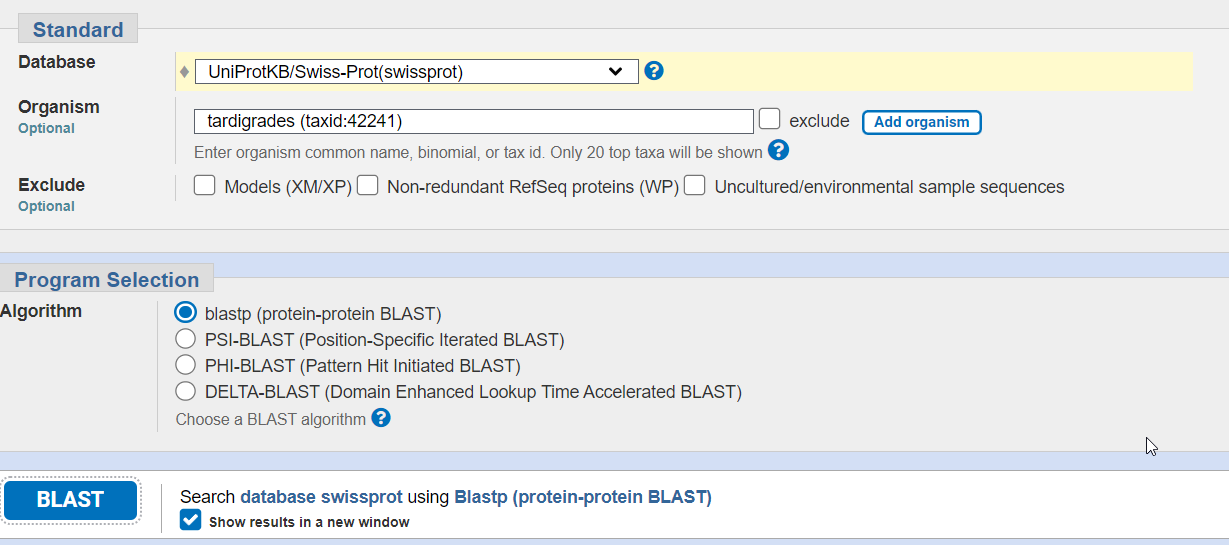

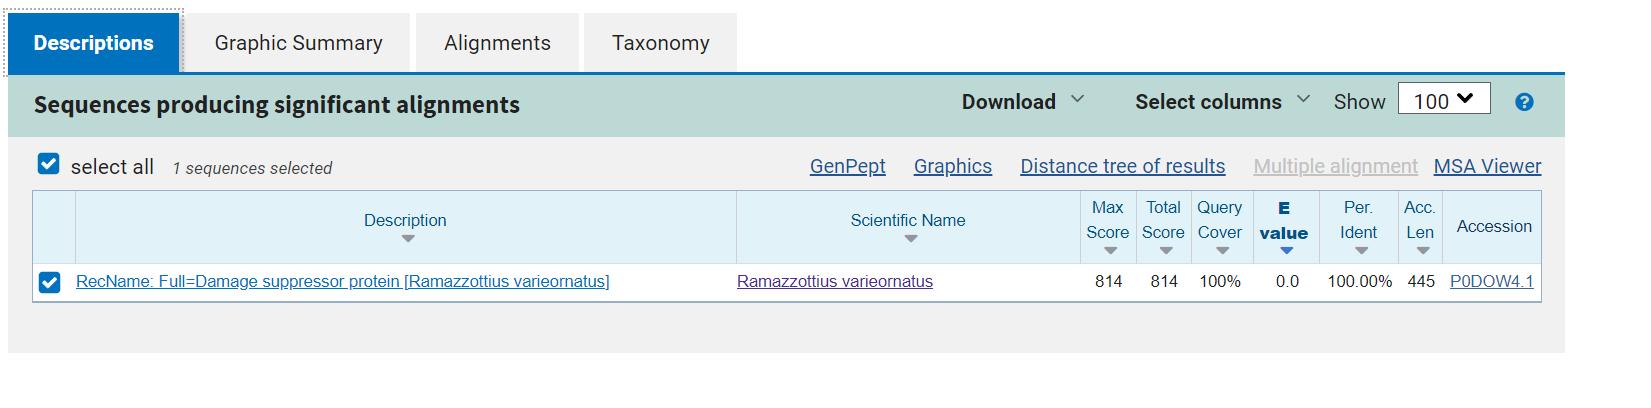

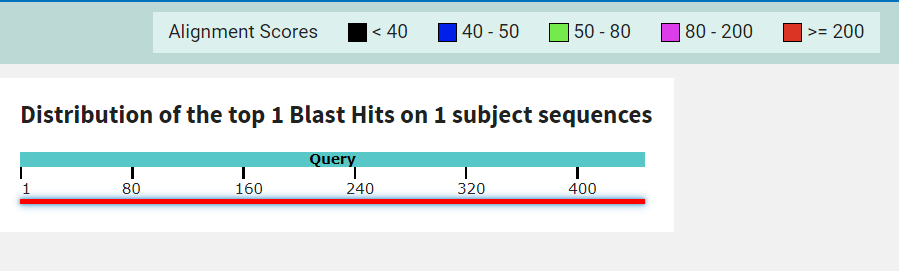

RecName: Full=Damage suppressor protein [Ramazzottius varieornatus]

Sequence ID: P0DOW4.1Length: 445Number of Matches: 1

High alignment score

**P0DOW4. Damage suppressor protein. Gene Dsup**

            [FUNCTION] Unique chromatin-associating protein that contributes to
            the organism's exceptional tolerance to harsh environmental
            stresses (PubMed:27649274, PubMed:31571581). Binds with a higher
            affinity to nucleosomes than to free DNA (PubMed:31571581).
            Protects chromatin from damage caused by hydroxyl radical-mediated
            cleavage induced by X-rays or treatment with hydrogen peroxide
            (PubMed:27649274, PubMed:31571581). Suppresses X-ray-induced DNA
            damage that includes single-strand breaks (SSBs) as well as more
            hazardous double-strand breaks (DSBs), and improves radiotolerance
            (PubMed:27649274). Shields also DNA against reactive oxygen species
            (ROS) (PubMed:27649274). {ECO:0000269|PubMed:27649274,
            ECO:0000269|PubMed:31571581}.
            
            [SUBCELLULAR LOCATION] Nucleus {ECO:0000269|PubMed:27649274}.
            [WEB RESOURCE] Name=Protein Spotlight; Note=A walk on the rough
            side - Issue 188 of February 2017;
            URL='https://web.expasy.org/spotlight/back_issues/188/'.

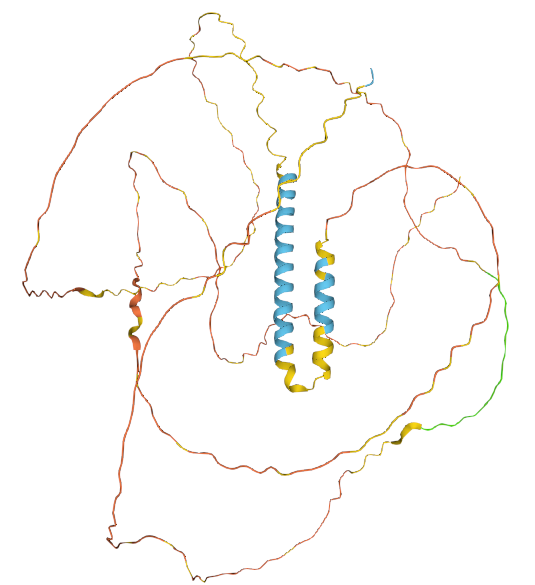

In [202]:
# g14472.t1
blast = pd.read_csv('tables/R58WJ77D01N-Alignment.txt', sep = '\t',skiprows=7, names = 'query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives'.split(','))
blast['Sequence ID'] = 'g14472.t1'
blast.columns

Index(['query acc.ver', ' subject acc.ver', ' % identity', ' alignment length',
       ' mismatches', ' gap opens', ' q. start', ' q. end', ' s. start',
       ' s. end', ' evalue', ' bit score', ' % positives', 'Sequence ID'],
      dtype='object')

In [203]:
blast = blast[['Sequence ID',' subject acc.ver',' % identity', ' evalue', ' bit score']]

[Publications](https://www.uniprot.org/uniprotkb/P0DOW4/publications)

**6. Pfam prediction**

Transport protein Trs120 or TRAPPC9, TRAPP II complex subunit

[link of the job](https://www.ebi.ac.uk/Tools/hmmer/results/B3DC0234-9581-11EE-8F57-7E19FAE0C6C4.4/score)

In [189]:
#	g11513.t1
g11513= pd.read_csv('tables/B3DC0234-9581-11EE-8F57-7E19FAE0C6C4.4.tsv', sep = '\t')
g11513['# ID'] = 'g11513.t1'

In [190]:
#	g15484.t1
g15484 = pd.read_csv('tables/B3DC0234-9581-11EE-8F57-7E19FAE0C6C4.6.tsv', sep = '\t')
g15484['# ID'] = 'g15484.t1'

In [191]:
#g2203.t1
g2203 = pd.read_csv('tables/B3DC0234-9581-11EE-8F57-7E19FAE0C6C4.8.tsv', sep = '\t')
g2203['# ID'] = 'g2203.t1'

In [213]:
pfam = pd.concat([g11513, g15484, g2203])
pfam = pfam.drop_duplicates(subset=['# ID'])

[link for all peptide search](https://www.ebi.ac.uk/Tools/hmmer/results/16246492-958A-11EE-B563-462BFAE0C6C4/score)

**7. Integrate your various pieces of evidence**

In [214]:
pfam.columns

Index(['Family id', 'Family Accession', 'Clan', 'Env. Start', 'Env. End',
       'Ali. Start', 'Ali. End', 'Model Start', 'Model End', 'Bit Score',
       'Ind. E-value', 'Cond. E-value', 'Description', '# ID'],
      dtype='object')

In [215]:
pfam = pfam[['Family id','Ind. E-value', '# ID' ]]

In [182]:
blast

,Sequence ID,subject acc.ver,% identity
0,g14472.t1,P0DOW4.1,100.0


In [166]:
prot_locs

,# ID,Prediction,OTHER,SP,mTP,CS Position
0,g5641.t1,SP,0.000130,0.999869,0.000001,CS pos: 16-17. ACA-AS. Pr: 0.4873
1,g15153.t1,SP,0.000014,0.999986,0.000000,CS pos: 16-17. AYA-AN. Pr: 0.8378
2,g12562.t1,SP,0.000076,0.999923,0.000001,CS pos: 16-17. SYA-AN. Pr: 0.7910
3,g5616.t1,SP,0.000067,0.999933,0.000000,CS pos: 16-17. ACA-AN. Pr: 0.5270
4,g13530.t1,SP,0.116007,0.883840,0.000153,CS pos: 19-20. TIP-FT. Pr: 0.3552
5,g14472.t1,OTHER,0.999999,0.000001,0.000000,NaN
6,g4106.t1,OTHER,0.729658,0.266917,0.003425,NaN
7,g10513.t1,OTHER,0.999999,0.000001,0.000000,NaN
8,g3428.t1,OTHER,0.999903,0.000033,0.000064,NaN
9,g11513.t1,OTHER,0.999434,0.000401,0.000164,NaN


In [172]:
## HMMER
hmmer = pd.read_csv('tables/Supplementary.tsv', sep = '\t')
hmmer.head()

,Sequence ID,Hits Found,Top Hit Identifier,Description
0,g5641.t1,1,CBM_14,Chitin binding Peritrophin-A domain
1,g15153.t1,1,CBM_14,Chitin binding Peritrophin-A domain
2,g12562.t1,1,CBM_14,Chitin binding Peritrophin-A domain
3,g5616.t1,1,CBM_14,Chitin binding Peritrophin-A domain
4,g13530.t1,0,NaN,NaN


In [181]:
locs_hmmer = pd.merge(prot_locs, hmmer, left_on='# ID', right_on="Sequence ID")

In [242]:
locs_hmmer.head()

,# ID,Prediction,OTHER,SP,mTP,CS Position,Sequence ID,Hits Found,Top Hit Identifier,Description
0,g5641.t1,SP,0.000130,0.999869,0.000001,CS pos: 16-17. ACA-AS. Pr: 0.4873,g5641.t1,1,CBM_14,Chitin binding Peritrophin-A domain
1,g15153.t1,SP,0.000014,0.999986,0.000000,CS pos: 16-17. AYA-AN. Pr: 0.8378,g15153.t1,1,CBM_14,Chitin binding Peritrophin-A domain
2,g12562.t1,SP,0.000076,0.999923,0.000001,CS pos: 16-17. SYA-AN. Pr: 0.7910,g12562.t1,1,CBM_14,Chitin binding Peritrophin-A domain
3,g5616.t1,SP,0.000067,0.999933,0.000000,CS pos: 16-17. ACA-AN. Pr: 0.5270,g5616.t1,1,CBM_14,Chitin binding Peritrophin-A domain
4,g13530.t1,SP,0.116007,0.883840,0.000153,CS pos: 19-20. TIP-FT. Pr: 0.3552,g13530.t1,0,NaN,NaN


In [204]:
locs_hmerr_blast = pd.merge(locs_hmmer,blast,on="Sequence ID", how = "outer")

In [216]:
all_df = pd.merge(locs_hmerr_blast, pfam, on = '# ID', how = "outer")

In [234]:
all_df = pd.merge(all_df, wolf, on = '# ID', how = "outer")

In [235]:
all_df.columns

Index(['# ID', 'Prediction', 'OTHER', 'SP', 'mTP', 'CS Position',
       'Sequence ID', 'Hits Found', 'Top Hit Identifier', 'Description',
       ' subject acc.ver', ' % identity', ' evalue', ' bit score', 'Family id',
       'Ind. E-value', 'combined'],
      dtype='object')

In [200]:
all_df

,# ID,Prediction,OTHER,SP,mTP,CS Position,Sequence ID,Hits Found,Top Hit Identifier,Description_x,...,Env. Start,Env. End,Ali. Start,Ali. End,Model Start,Model End,Bit Score,Ind. E-value,Cond. E-value,Description_y
0,g5641.t1,SP,0.000130,0.999869,0.000001,CS pos: 16-17. ACA-AS. Pr: 0.4873,g5641.t1,1,CBM_14,Chitin binding Peritrophin-A domain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,g15153.t1,SP,0.000014,0.999986,0.000000,CS pos: 16-17. AYA-AN. Pr: 0.8378,g15153.t1,1,CBM_14,Chitin binding Peritrophin-A domain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,g12562.t1,SP,0.000076,0.999923,0.000001,CS pos: 16-17. SYA-AN. Pr: 0.7910,g12562.t1,1,CBM_14,Chitin binding Peritrophin-A domain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,g5616.t1,SP,0.000067,0.999933,0.000000,CS pos: 16-17. ACA-AN. Pr: 0.5270,g5616.t1,1,CBM_14,Chitin binding Peritrophin-A domain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,g13530.t1,SP,0.116007,0.883840,0.000153,CS pos: 19-20. TIP-FT. Pr: 0.3552,g13530.t1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,g14472.t1,OTHER,0.999999,0.000001,0.000000,NaN,g14472.t1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,g4106.t1,OTHER,0.729658,0.266917,0.003425,NaN,g4106.t1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,g10513.t1,OTHER,0.999999,0.000001,0.000000,NaN,g10513.t1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,g3428.t1,OTHER,0.999903,0.000033,0.000064,NaN,g3428.t1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,g11513.t1,OTHER,0.999434,0.000401,0.000164,NaN,g11513.t1,1,TRAPPC9-Trs120,"Transport protein Trs120 or TRAPPC9, TRAPP II ...",...,54.0,358.0,66.0,331.0,75.0,307.0,36.65,9.600000e-10,4.900000e-14,"Transport protein Trs120 or TRAPPC9, TRAPP II ..."


In [238]:
finaldf = all_df[['# ID',  'Top Hit Identifier',
        'Description' ,' subject acc.ver', ' % identity', ' evalue', 
        'Family id','Ind. E-value',
        'combined' ,
       'Prediction','CS Position'
       ]]

In [240]:
# aggregated data
finaldf

,# ID,Top Hit Identifier,Description,subject acc.ver,% identity,evalue,Family id,Ind. E-value,combined,Prediction,CS Position
0,g5641.t1,CBM_14,Chitin binding Peritrophin-A domain,NaN,NaN,NaN,NaN,NaN,NaN,SP,CS pos: 16-17. ACA-AS. Pr: 0.4873
1,g15153.t1,CBM_14,Chitin binding Peritrophin-A domain,NaN,NaN,NaN,NaN,NaN,NaN,SP,CS pos: 16-17. AYA-AN. Pr: 0.8378
2,g12562.t1,CBM_14,Chitin binding Peritrophin-A domain,NaN,NaN,NaN,NaN,NaN,NaN,SP,CS pos: 16-17. SYA-AN. Pr: 0.7910
3,g5616.t1,CBM_14,Chitin binding Peritrophin-A domain,NaN,NaN,NaN,NaN,NaN,NaN,SP,CS pos: 16-17. ACA-AN. Pr: 0.5270
4,g13530.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"g13530.t1 details extr: 13, nucl: 6.5, lyso: 5...",SP,CS pos: 19-20. TIP-FT. Pr: 0.3552
5,g14472.t1,NaN,NaN,P0DOW4.1,100.0,0.0,NaN,NaN,"g14472.t1 details nucl: 28, plas: 2, cyto: 1, ...",OTHER,NaN
6,g4106.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHER,NaN
7,g10513.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"g10513.t1 details nucl: 20, cyto_nucl: 14.5, c...",OTHER,NaN
8,g3428.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"g3428.t1 details mito: 18, cyto: 11, extr: 2, ...",OTHER,NaN
9,g11513.t1,TRAPPC9-Trs120,"Transport protein Trs120 or TRAPPC9, TRAPP II ...",NaN,NaN,NaN,TRAPPC9-Trs120,9.600000e-10,"g11513.t1 details cyto: 17, cyto_nucl: 12.8333...",OTHER,NaN


In [241]:
finaldf.to_csv('Supplementary_table1.tsv', sep = '\t', index = False)

In [249]:
# should pay attention!
finaldf.query('Prediction == "OTHER" and Description.isnull() and not combined.isnull()')

,# ID,Top Hit Identifier,Description,subject acc.ver,% identity,evalue,Family id,Ind. E-value,combined,Prediction,CS Position
5,g14472.t1,NaN,NaN,P0DOW4.1,100.0,0.0,NaN,NaN,"g14472.t1 details nucl: 28, plas: 2, cyto: 1, ...",OTHER,NaN
7,g10513.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"g10513.t1 details nucl: 20, cyto_nucl: 14.5, c...",OTHER,NaN
8,g3428.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"g3428.t1 details mito: 18, cyto: 11, extr: 2, ...",OTHER,NaN
10,g5443.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"g5443.t1 details extr: 28, nucl: 3, cyto: 1 No...",OTHER,NaN
21,g10514.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"g10514.t1 details nucl: 19, cyto_nucl: 15, cyt...",OTHER,NaN


In [251]:
finaldf.query('Prediction == "OTHER" and Description.isnull() and combined.isnull()')

,# ID,Top Hit Identifier,Description,subject acc.ver,% identity,evalue,Family id,Ind. E-value,combined,Prediction,CS Position
6,g4106.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHER,NaN
15,g12510.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHER,NaN
16,g5237.t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHER,NaN
